## Introduction
Learning to do predictions based on a given dataset. The chosen dataset is the Gender recognition of voice dataset from Kaggle. The assignment that is connected to this dataset is predict the variable label (male or female).

In [148]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math 
from sklearn.model_selection import train_test_split

df = pd.read_csv("voice.csv")
df

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3168 rows x 21 columns]

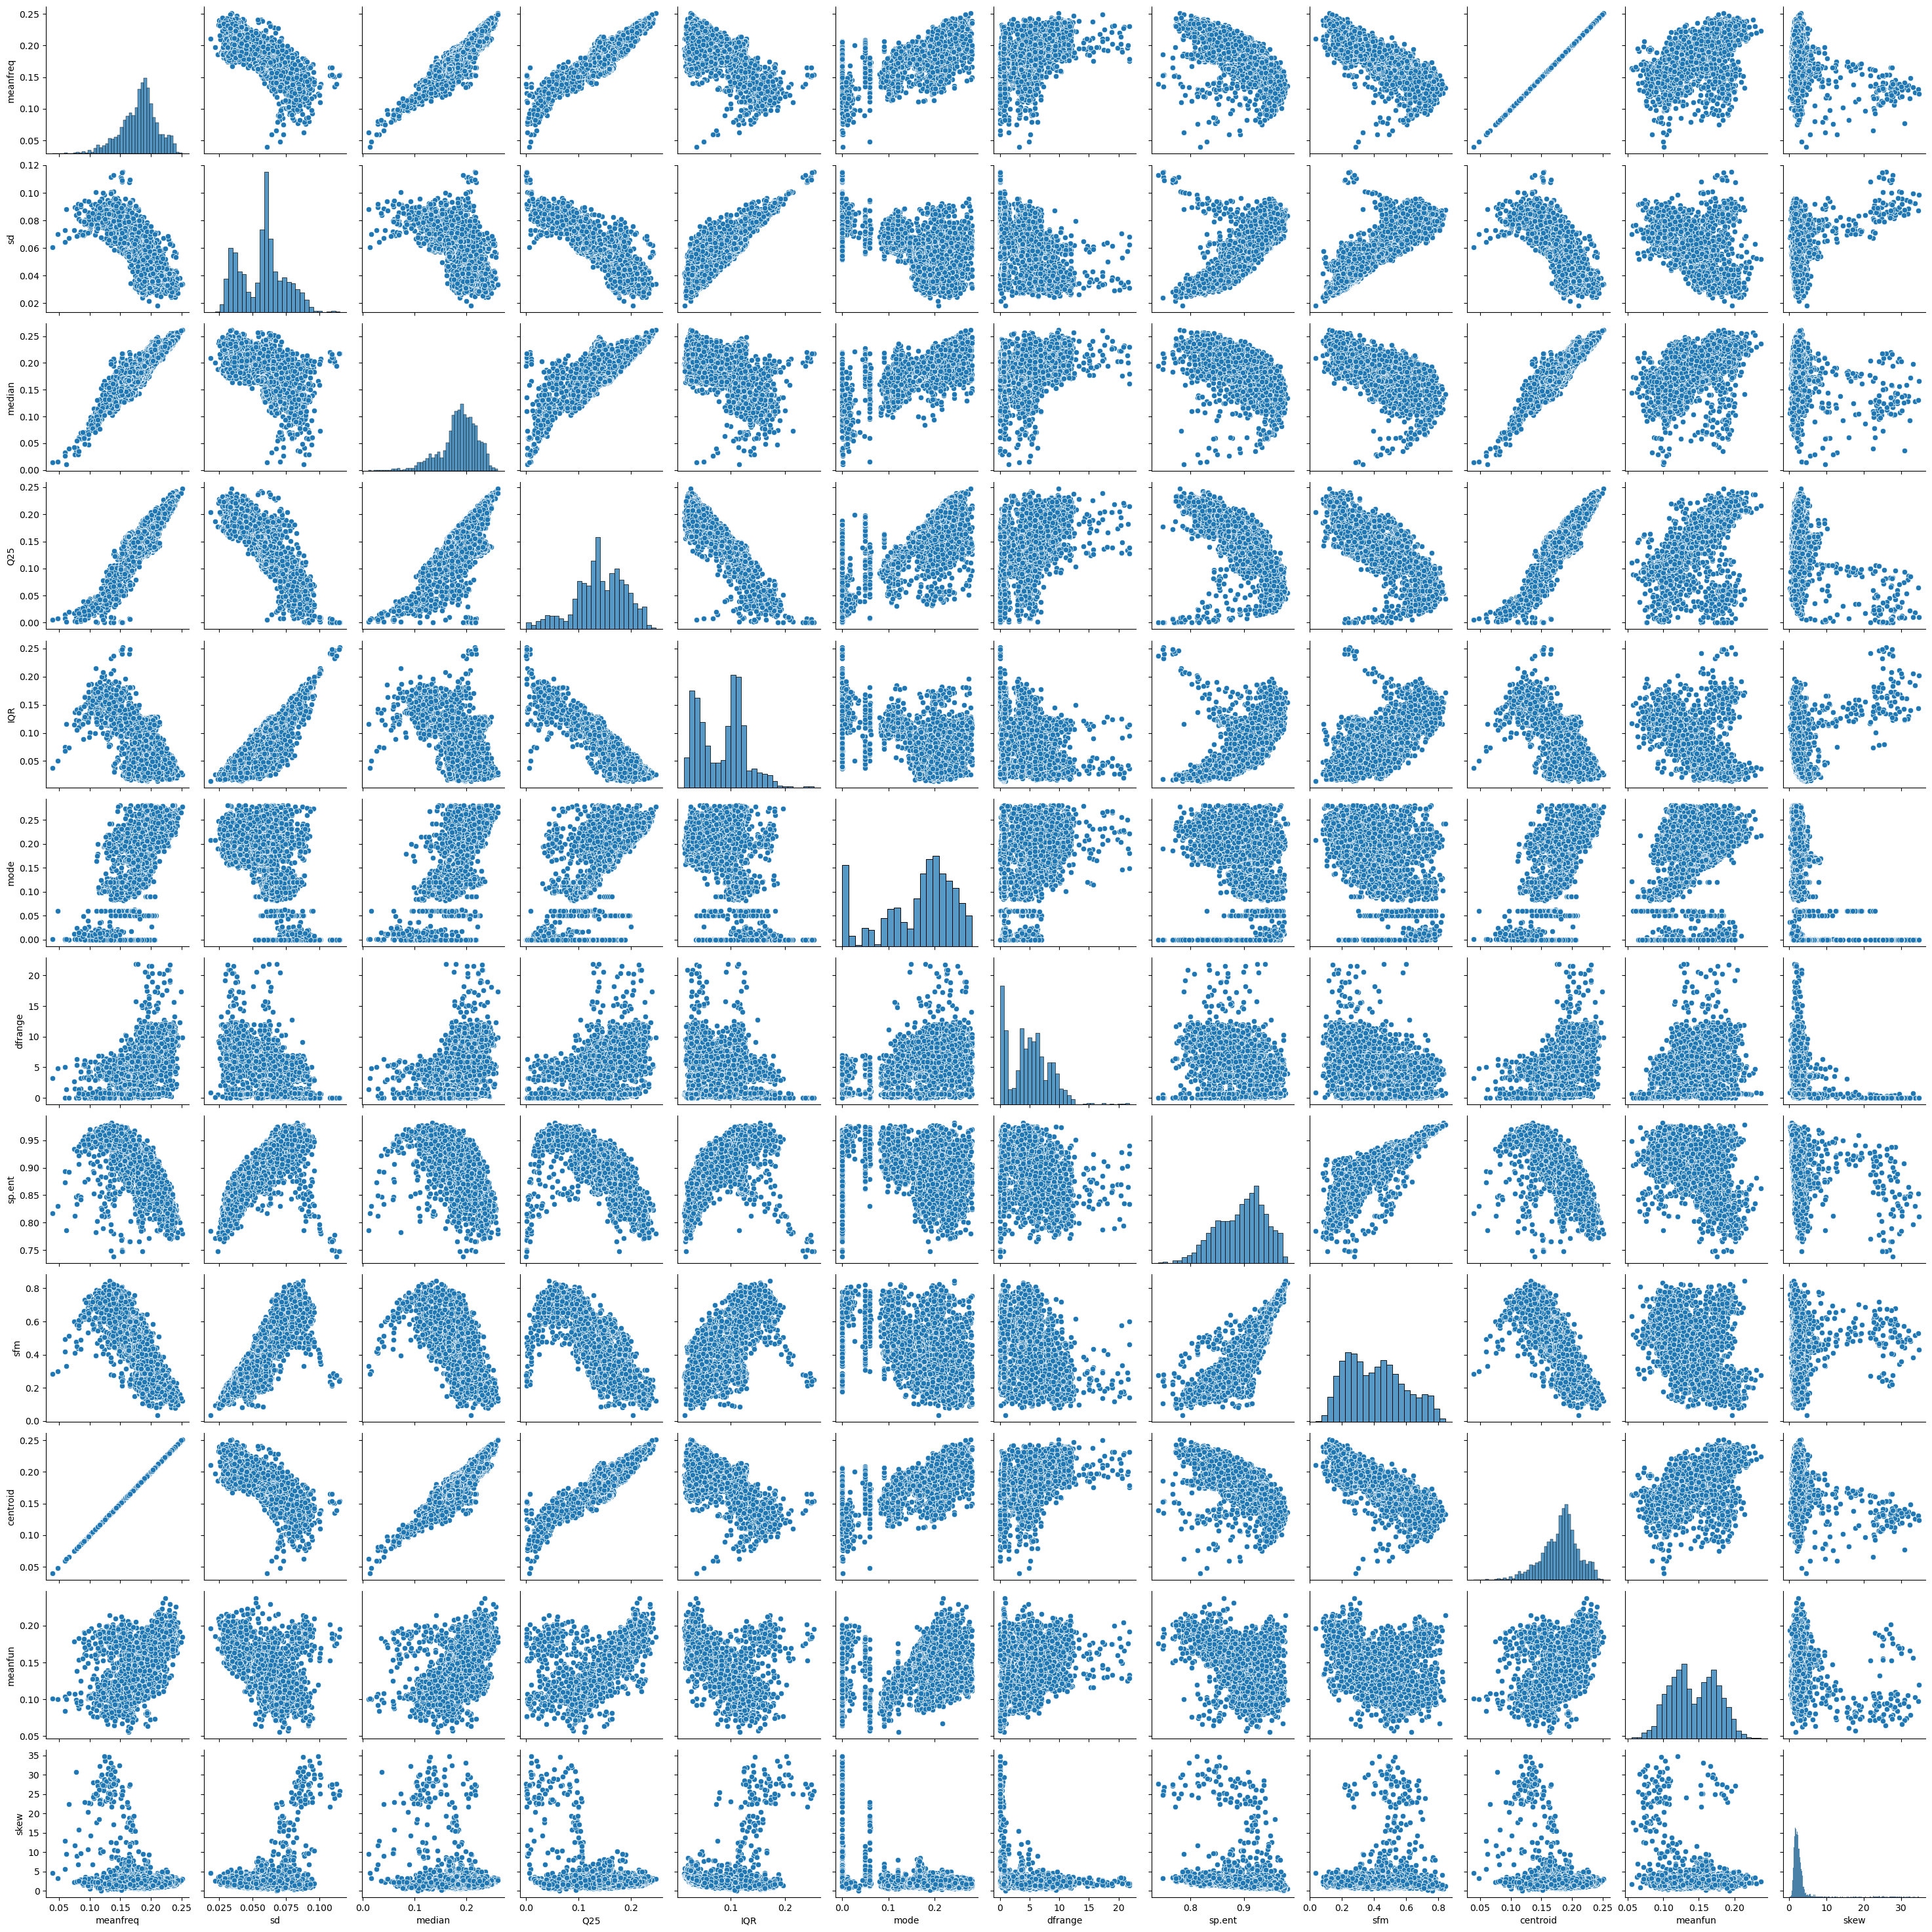

In [149]:
#finding correlations in dataset
df_subset = df[["meanfreq", "sd", "median", "Q25","IQR","mode", "dfrange", 'sp.ent', 'sfm', 'centroid', 'meanfun','skew','label']]
sns.pairplot(df_subset)
plt.show()

## Some conclusions:


- *__meanfreq__* seems linear related to *__median__*, *__Q25__* and *__Q75__*. It doesn't seem to be linear correlated with  *__mode__*.
- *__IQR__* is strongly correltaed to *__SD__*.

## Data cleaning

Cut down the data set down to size. Though not strictly necessary, this is strongly recommended to make it easier. Select 7 variables with strong predictive value, based on your knowledge of the topic (domain knowledge) and/or correlation. Remember to subset the data with df[[‘column 1’, ‘column2’, ‘column3’]]. Don't spend too much time on this step. It's supposed to make the assignment easier, not harder.

To clean the dataset I used displot function to look at the biggest differences with the female and male label for the columns.

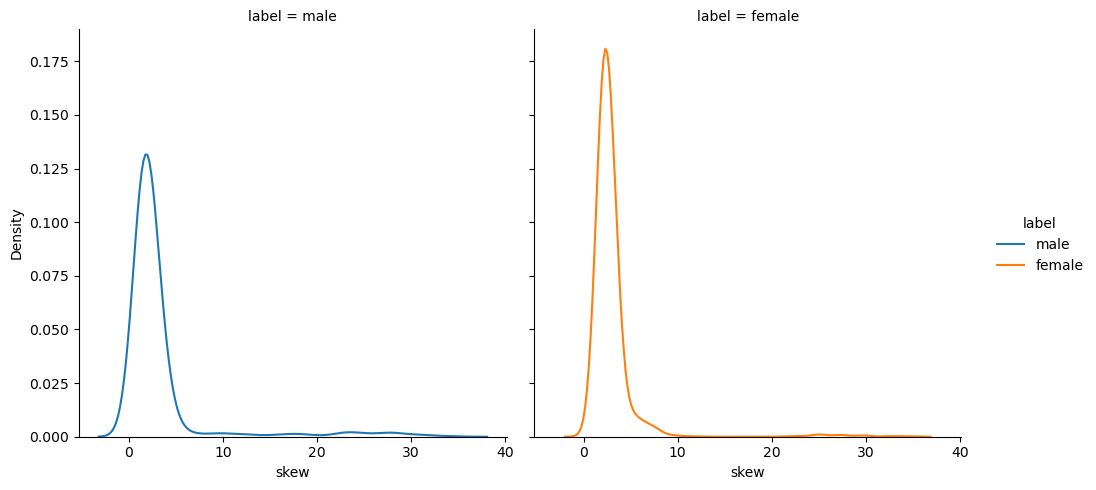

In [150]:
#df_subset
#sns.countplot(x=df_subset["label"], hue=df["label"], data=df)
#plt.show()
sns.displot(data=df, x="skew", hue="label", col="label", kind="kde")


## Exploratory data analysis
present relevant grahs and tables with respect to your problem:

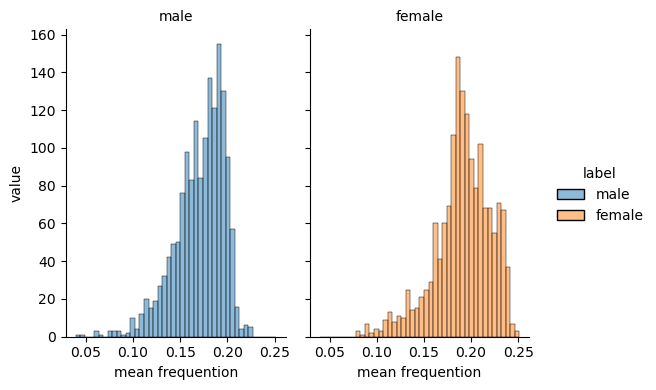

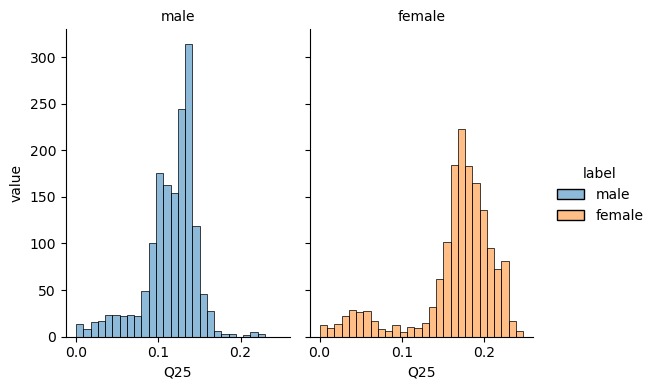

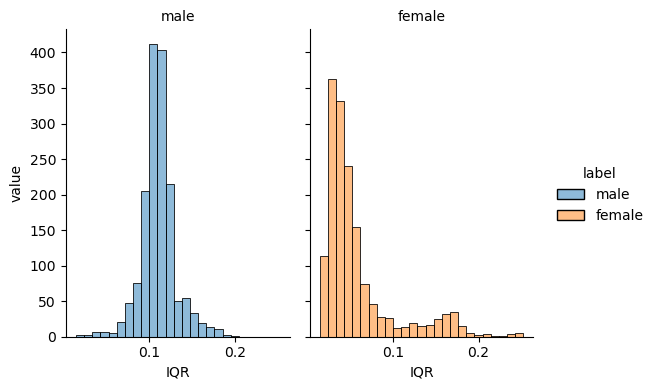

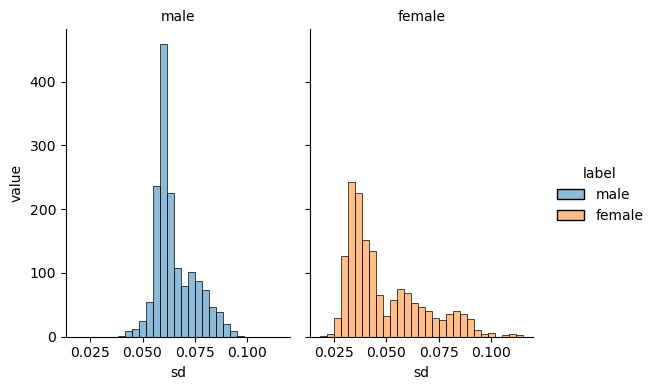

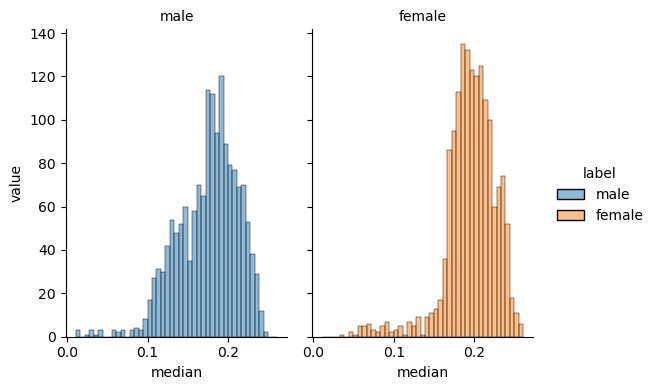

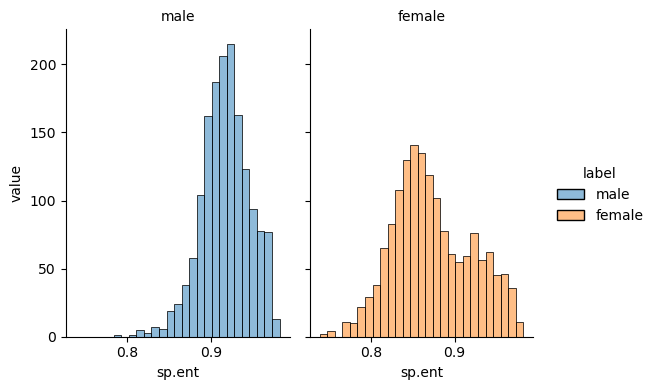

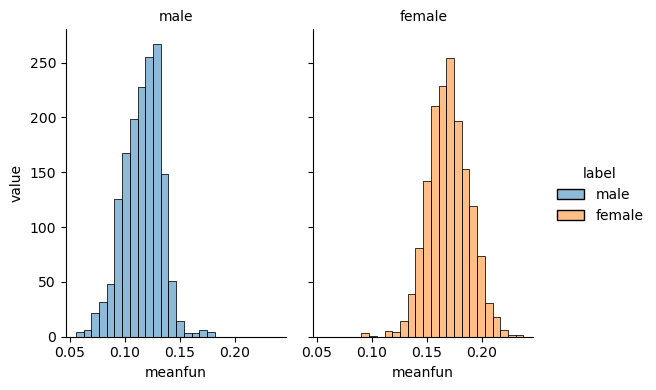

In [151]:
g = sns.displot(
    data=df_subset, x="meanfreq", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("mean frequention","value")
g.set_titles("{col_name}")

g = sns.displot(
    data=df_subset, x="Q25", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("Q25","value")
g.set_titles("{col_name}")

g = sns.displot(
    data=df_subset, x="IQR", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("IQR","value")
g.set_titles("{col_name}")

g = sns.displot(
    data=df_subset, x="sd", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("sd","value")
g.set_titles("{col_name}")

g = sns.displot(
    data=df_subset, x="median", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("median","value")
g.set_titles("{col_name}")

g = sns.displot(
    data=df_subset, x="sp.ent", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("sp.ent","value")
g.set_titles("{col_name}")

g = sns.displot(
    data=df_subset, x="meanfun", hue="label", col="label",
    kind="hist", height=4, aspect=.7,
)
g.set_axis_labels("meanfun","value")
g.set_titles("{col_name}")


In [152]:
df_subset.corr()

meanfreq        sd    median       Q25       IQR      mode  \
meanfreq  1.000000 -0.739039  0.925445  0.911416 -0.627605  0.687715   
sd       -0.739039  1.000000 -0.562603 -0.846931  0.874660 -0.529150   
median    0.925445 -0.562603  1.000000  0.774922 -0.477352  0.677433   
Q25       0.911416 -0.846931  0.774922  1.000000 -0.874189  0.591277   
IQR      -0.627605  0.874660 -0.477352 -0.874189  1.000000 -0.403764   
mode      0.687715 -0.529150  0.677433  0.591277 -0.403764  1.000000   
dfrange   0.515570 -0.475999  0.435621  0.454394 -0.331563  0.473775   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126  0.640813 -0.325298   
sfm      -0.784332  0.838086 -0.661690 -0.766875  0.663601 -0.485913   
centroid  1.000000 -0.739039  0.925445  0.911416 -0.627605  0.687715   
meanfun   0.460844 -0.466281  0.414909  0.545035 -0.534462  0.324771   
skew     -0.322327  0.314597 -0.257407 -0.319475  0.249497 -0.434859   

           dfrange    sp.ent       sfm  centroid   meanfun      skew  
meanfreq  0.515570 -0.601203 -0.784332  1.000000  0.460844 -0.322327  
sd       -0.475999  0.716620  0.838086 -0.739039 -0.466281  0.314597  
median    0.435621 -0.502005 -0.661690  0.925445  0.414909 -0.257407  
Q25       0.454394 -0.648126 -0.766875  0.911416  0.545035 -0.319475  
IQR      -0.331563  0.640813  0.663601 -0.627605 -0.534462  0.249497  
mode      0.473775 -0.325298 -0.485913  0.687715  0.324771 -0.434859  
dfrange   1.000000 -0.319054 -0.431580  0.515570  0.275154 -0.304640  
sp.ent   -0.319054  1.000000  0.866411 -0.601203 -0.513194 -0.195459  
sfm      -0.431580  0.866411  1.000000 -0.784332 -0.421066  0.079694  
centroid  0.515570 -0.601203 -0.784332  1.000000  0.460844 -0.322327  
meanfun   0.275154 -0.513194 -0.421066  0.460844  1.000000 -0.167668  
skew     -0.304640 -0.195459  0.079694 -0.322327 -0.167668  1.000000

In [153]:
dummies = pd.get_dummies(df_subset["label"])
pd.get_dummies(df_subset["label"])
df_subset = pd.concat([df_subset, dummies], axis= 1)
df_subset.head()

meanfreq        sd    median       Q25       IQR      mode   dfrange  \
0  0.059781  0.064241  0.032027  0.015071  0.075122  0.000000  0.000000   
1  0.066009  0.067310  0.040229  0.019414  0.073252  0.000000  0.046875   
2  0.077316  0.083829  0.036718  0.008701  0.123207  0.000000  0.007812   
3  0.151228  0.072111  0.158011  0.096582  0.111374  0.083878  0.554688   
4  0.135120  0.079146  0.124656  0.078720  0.127325  0.104261  5.476562   

     sp.ent       sfm  centroid   meanfun       skew label  female  male  
0  0.893369  0.491918  0.059781  0.084279  12.863462  male       0     1  
1  0.892193  0.513724  0.066009  0.107937  22.423285  male       0     1  
2  0.846389  0.478905  0.077316  0.098706  30.757155  male       0     1  
3  0.963322  0.727232  0.151228  0.088965   1.232831  male       0     1  
4  0.971955  0.783568  0.135120  0.106398   1.101174  male       0     1

## Predicitve model 
To build our model I'm going to use:
- __*meanfreq*__
- __*IQR*__ 
(- __*Q25*__)
- __*meanfun*__
- __*female*__

We __don't__ use: 
- __*dfrange*__: *dfrange* isn't strongly correlated to anything which will not help our model.
- __*mode*__: *mode* isn't strongly correlated to anything which will not help our model.
- __*median*__: Median is too strongly correlated with *meanfreq* and will maybe mask the other results. *Meanfreq* has more correlation between other variables that's why I chose *meanfreq* over *median*.
- __*male*__: We can only include one of the two dummy variables.

In [109]:
X = df_subset[['meanfreq', 'IQR', 'meanfun']]
X

meanfreq       IQR   meanfun
0     0.059781  0.075122  0.084279
1     0.066009  0.073252  0.107937
2     0.077316  0.123207  0.098706
3     0.151228  0.111374  0.088965
4     0.135120  0.127325  0.106398
...        ...       ...       ...
3163  0.131884  0.151859  0.182790
3164  0.116221  0.162193  0.188980
3165  0.142056  0.190936  0.209918
3166  0.143659  0.176435  0.172375
3167  0.165509  0.180756  0.185607

[3168 rows x 3 columns]

In [110]:
y = df_subset['female']
y

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: female, Length: 3168, dtype: uint8

In [111]:
lm = LinearRegression()
lm.fit(X,y)
print(f"intercept {lm.intercept_}")
print(f"Coefficients {lm.coef_}")

intercept -0.06374769373139544
Coefficients [-3.98784042 -4.32280709 11.55146878]


Interpretation of intercept:
-0.0637

Interpretation of coefficients:
- the meanfreq of females is -3.9878
- IQR females have -4.3228
- meanfun females have 11.5514

In [135]:
from sklearn.preprocessing import normalize
X = normalize(X) #normalize the matrix to put everything on the same scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

This means that it's 0.96% accurate. That does align with what is stated on Kaggle.

## Evaluation (next week)

In [169]:
y_pred= lm.predict(X)
df_subset['y_pred'] = lm.predict(X)

C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [165]:
math.sqrt(mean_squared_error(df_subset["female"],y_pred))

2.006988144351471

The model has a typical error (RMSE) of 2.0069

In [166]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.9663512092534174

This means that it's 0.96% accurate. That does align with what is stated on Kaggle.

In [167]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creating a "confusion matrix"
cm
conf_matrix = pd.DataFrame(cm, index=['female', 'male'], columns = ['female_p', 'male_p']) 
conf_matrix

female_p  male_p
female       476      18
male          14     443

The _recall_ and _precision_ for the female is:

$recall = \frac{476}{476 + 18} = .96$

$precision = \frac{48}{48 + 14} = .77$

### interpretation of results

476 are correctly predicted as 'female', 18 are instead predicted as 'male'. The recall and precision for the category female is .96 and the precision is .77.

In [175]:
#taking three values that are already known in my data set to see what prediction it does: meanfreq, IQR, meanfun. Outcome should be female
print("The prediction of the label for this person is :", lm.predict([[0.131884, 0.151859, 0.182790]])) #female
print("The prediction of the label for this person is :", lm.predict([[0.116221, 0.162193, 0.188980]])) #female
print("The prediction of the label for this person is :", lm.predict([[0.142056, 0.190936, 0.209918]])) #female
print("The prediction of the label for this person is :", lm.predict([[0.077316, 0.123207, 0.098706]])) #male
print("The prediction of the label for this person is :", lm.predict([[0.151228, 0.111374, 0.088965]])) #male
print("The prediction of the label for this person is :", lm.predict([[0.077316, 0.123207, 0.098706]])) #male

The prediction of the label for this person is : [0.86535578]
The prediction of the label for this person is : [0.95464903]
The prediction of the label for this person is : [0.96923738]
The prediction of the label for this person is : [0.23552762]
The prediction of the label for this person is : [-0.12059272]
The prediction of the label for this person is : [0.23552762]


C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [173]:
df_subset

meanfreq        sd    median       Q25       IQR      mode   dfrange  \
0     0.059781  0.064241  0.032027  0.015071  0.075122  0.000000  0.000000   
1     0.066009  0.067310  0.040229  0.019414  0.073252  0.000000  0.046875   
2     0.077316  0.083829  0.036718  0.008701  0.123207  0.000000  0.007812   
3     0.151228  0.072111  0.158011  0.096582  0.111374  0.083878  0.554688   
4     0.135120  0.079146  0.124656  0.078720  0.127325  0.104261  5.476562   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.131884  0.084734  0.153707  0.049285  0.151859  0.200836  4.203125   
3164  0.116221  0.089221  0.076758  0.042718  0.162193  0.013683  3.640625   
3165  0.142056  0.095798  0.183731  0.033424  0.190936  0.008006  2.929688   
3166  0.143659  0.090628  0.184976  0.043508  0.176435  0.212202  3.585938   
3167  0.165509  0.092884  0.183044  0.070072  0.180756  0.267702  0.546875   

        sp.ent       sfm  centroid   meanfun       skew   label  female  male  \
0     0.893369  0.491918  0.059781  0.084279  12.863462    male       0     1   
1     0.892193  0.513724  0.066009  0.107937  22.423285    male       0     1   
2     0.846389  0.478905  0.077316  0.098706  30.757155    male       0     1   
3     0.963322  0.727232  0.151228  0.088965   1.232831    male       0     1   
4     0.971955  0.783568  0.135120  0.106398   1.101174    male       0     1   
...        ...       ...       ...       ...        ...     ...     ...   ...   
3163  0.962934  0.763182  0.131884  0.182790   1.762129  female       1     0   
3164  0.960716  0.709570  0.116221  0.188980   0.693730  female       1     0   
3165  0.946854  0.654196  0.142056  0.209918   1.876502  female       1     0   
3166  0.950436  0.675470  0.143659  0.172375   1.591065  female       1     0   
3167  0.938829  0.601529  0.165509  0.185607   1.705029  female       1     0   

        y_pred  
0     3.148879  
1     4.498186  
2     1.638784  
3    -0.337279  
4     0.589628  
...        ...  
3163  3.354772  
3164  3.641895  
3165  3.191410  
3166  2.233009  
3167  2.221738  

[3168 rows x 16 columns]

## Conclusion 

The assignment connected to the dataset is to predict the variable label (male or female). After making a few graphs and looking for correlations and linear regressions the chosen variables were meanfreq, IQR and meanfun. 

Looking at the results 2 conclusions could be made about the training of the model.
1. There are a set of strong correlations, the chosen variables were were meanfreq, IQR and meanfun. If a new set of variables were chosen the accuracy of the model could possibly get higher.
3. Looking at the RMSE score, the predicition is off with 2.0096 which might be high for this dataset. Eventhough the RMSE is quite high the accuracy is still 96% which is high so this might not be a problem. Different variables could be used to lower the RMSE and gain a better accuracy. (the accuracy stated on Kaggle is 96% so a higher accuracy might not be possible)